In [48]:
# Data Handling and Analysis
import pandas as pd
import numpy as np

# Saving Results
import json

# Data Splitting
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LinearRegression

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Map plot
import matplotlib.pyplot as plt

In [50]:
# Load the housing data
file_path = "C:/Users/aaron/OneDrive - National College of Ireland/Year 3/Artificial Intelligence and Machine Learning/CA1/data/housing_price_cleaned.csv"
housing_data = pd.read_csv(file_path)

# Check the first few rows
print(housing_data.head())

   SquareFeet  Bedrooms  Bathrooms  YearBuilt          Price  \
0        2126         4          1       1969  215355.283618   
1        2459         3          2       1980  195014.221626   
2        1860         2          1       1970  306891.012076   
3        2294         2          1       1996  206786.787153   
4        2130         5          2       2001  272436.239065   

   Neighborhood_Suburb  Neighborhood_Urban  Neighborhood_Rural  Age  \
0                False               False                True   55   
1                False               False                True   44   
2                 True               False               False   54   
3                False                True               False   28   
4                 True               False               False   23   

   SquareFeet_Bedrooms  Log_Price  
0                 8504  12.280049  
1                 7377  12.180833  
2                 3720  12.634251  
3                 4588  12.239448  
4       

In [52]:
# Define features (X) and target (y)
X = housing_data.drop(columns=["Price"])
y = housing_data["Price"]

In [54]:
# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (39952, 10)
Testing set size: (9989, 10)


In [56]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred_price = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_price)
mse = mean_squared_error(y_test, y_pred_price)
r2 = r2_score(y_test, y_pred_price)

# Results as text
results_text = f"""
Mean Absolute Error (MAE): {mae}
Mean Squared Error (MSE): {mse}
R-squared (R²): {r2}
"""
print(results_text)

# Create a dictionary to hold the results
results = {
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "R-squared (R²)": r2
}

# Define the output JSON file path
output_json_path = "C:/Users/aaron/OneDrive - National College of Ireland/Year 3/Artificial Intelligence and Machine Learning/CA1/results/results_regression.json"

# Save results to JSON file
with open(output_json_path, 'w') as json_file:
    json.dump(results, json_file, indent=4)

# Print confirmation
print(f"Results saved to {output_json_path}")



Mean Absolute Error (MAE): 14151.636971878717
Mean Squared Error (MSE): 400621477.5712965
R-squared (R²): 0.9297000969127612

Results saved to C:/Users/aaron/OneDrive - National College of Ireland/Year 3/Artificial Intelligence and Machine Learning/CA1/results/results_regression.json


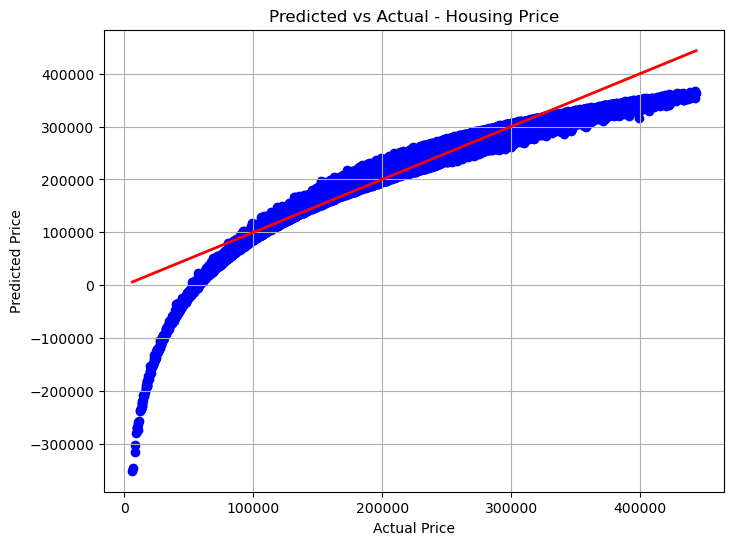

In [58]:
y_test = housing_data['Price']  # Actual values (from the 'Price' column)

# Use the correct feature set for making predictions
features = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 
            'Neighborhood_Suburb', 'Neighborhood_Urban', 'Neighborhood_Rural', 
            'Age', 'SquareFeet_Bedrooms', 'Log_Price']  


y_pred = model.predict(housing_data[features])  

# Create the plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')  # Scatter plot of actual vs predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2) 
plt.title('Predicted vs Actual - Housing Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()
